<a href="https://colab.research.google.com/github/MarioHenriqueUFAL/Projetos-de-Analise-de-Dados-Descritiva/blob/main/Analise_de_Dados_Financeiros/Projeto_Analise_Financeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação das Bibliotecas**

In [40]:
import pandas as pd #manipulação de tabelas
import matplotlib.pyplot as plt #criação de visualizações gráficas
import seaborn as sns #criação de visualizações gráficas
from matplotlib.ticker import FuncFormatter #manutenção do formato dos valores dos eixos x
import numpy as np #biblioteca de cálculo numérico

# **Pré-processamento dos Dados**

In [41]:
#Carregamento da base de dados
df = pd.read_excel('/content/DadosFinanceiros.xlsx')
df.head(10)

,Tipo,Componente,01/01/2019,01/02/2019,01/03/2019,01/04/2019,01/05/2019,01/06/2019,01/07/2019,01/08/2019,...,01/03/2022,01/04/2022,01/05/2022,01/06/2022,01/07/2022,01/08/2022,01/09/2022,01/10/2022,01/11/2022,01/12/2022
0,Receitas,Vendas,"30000,00","32456,90","33128,34","33560,00","33890,76","34200,00","34300,00","34500,00",...,"43000,00","43000,00","43000,00","43000,00","43000,00","43000,00","43000,00","43000,00","51500,00","51500,00"
1,Receitas,Aluguéis,"1000,00","1234,00","1267,00","1267,00","1267,00","1300,00","1340,00","1500,00",...,"4000,00","4000,00","4000,00","4000,00","6000,00","6000,00","6000,00","6000,00","6000,00","6000,00"
2,Receitas,Licenciamento,"5000,00","5000,00","5000,00","5000,00","5000,00","5000,00","5000,00","5000,00",...,"7000,00","7000,00","7000,00","7000,00","7000,00","7000,00","7000,00","7000,00","8000,00","8000,00"
3,Receitas,Franquias,"2000,00","2000,00","2000,00","2000,00","2000,00","2000,00","2000,00","2100,00",...,"1400,00","1400,00","2000,00","2000,00","1000,00","1000,00","1000,00","1000,00","2000,00","1000,00"
4,Receitas,Investimentos,"2000,00","2000,00","2000,00","2000,00","2000,00","2000,00","2000,00","2000,00",...,"2500,00","2500,00","2500,00","2000,00","2000,00","2000,00","2000,00","2000,00","2500,00","2500,00"
5,Receitas,Publicidade,"1000,00","2690,90","4395,34","3827,00","5157,76","4500,00","3640,00","2900,00",...,"3900,00","340,00","900,00","15000,00","1500,00","2000,00","2500,00","1000,00","1500,00","500,00"
6,Despesas,Administrativo,"10000,00","10000,00","10000,00","10000,00","10000,00","10000,00","12000,00","12000,00",...,"15000,00","15000,00","15000,00","15000,00","15000,00","15000,00","15000,00","15000,00","15000,00","15000,00"
7,Despesas,Tecnologia,"6000,00","6000,00","6000,00","6000,00","6000,00","6000,00","6000,00","6000,00",...,"10000,00","8000,00","8000,00","8000,00","10000,00","10000,00","10000,00","8000,00","10000,00","10000,00"
8,Despesas,Impostos,"1000,00","1000,00","1000,00","1000,00","1000,00","1000,00","1000,00","1000,00",...,"3000,00","3000,00","3000,00","3000,00","3000,00","3000,00","3000,00","3000,00","3000,00","4000,00"
9,Despesas,Salários,"2500,00","2500,00","2500,00","2500,00","2500,00","2500,00","2500,00","2500,00",...,"10000,00","10000,00","10000,00","10000,00","10000,00","10000,00","10000,00","10000,00","12000,00","12000,00"


**Despivotamento da Tabela**

Para transformar a base de dados em um formato plano, com as colunas Tipo, Componente, Data e Valor, é necessário despivotar a tabela. Para essa tarefa, utilizamos a função "melt" da biblioteca Pandas.

Na função melt(), id_vars são as colunas que você deseja manter na tabela (neste caso, 'Tipo' e 'Componente'), var_name é o nome da nova coluna que vai conter os nomes das colunas antigas (neste caso, 'Data'), e value_name é o nome da nova coluna que vai conter os valores das colunas antigas (neste caso, 'Valor').

In [42]:
#Pivotamento da base de dados
df = pd.melt(df, id_vars = ['Tipo','Componente'], var_name = 'Data', value_name = 'Valor')
df

,Tipo,Componente,Data,Valor
0,Receitas,Vendas,01/01/2019,"30000,00"
1,Receitas,Aluguéis,01/01/2019,"1000,00"
2,Receitas,Licenciamento,01/01/2019,"5000,00"
3,Receitas,Franquias,01/01/2019,"2000,00"
4,Receitas,Investimentos,01/01/2019,"2000,00"
...,...,...,...,...
427,Despesas,Tecnologia,01/12/2022,"10000,00"
428,Despesas,Impostos,01/12/2022,"4000,00"
429,Despesas,Salários,01/12/2022,"12000,00"
430,Despesas,Marketing,01/12/2022,"1500,00"


Dessa forma, temos uma base de dados com 4 colunas: Tipo, Componente, Data e Valor, prontas para serem processadas e utilizadas no estudo de análise de dados descritiva e construçâo dos dashboards de dados financeiros.

O primeiro passo nesta etapa é a verificação das informações sobre a base de dados:

1. Há elementos ausentes?

2. Qual o tipo de cada variável?

3. Qual a quantidade de dados armazenados em cada coluna?

In [43]:
#Informações sobre a base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tipo        432 non-null    object
 1   Componente  432 non-null    object
 2   Data        432 non-null    object
 3   Valor       432 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


A partir do código acima, podemos verificar que as colunas "Data" e "Valor" estão no formato de string, o que é problemático para o processamento dos dados. Logo, devemos converter a coluna "Data" para o tipo data, e a coluna "Valor" para o tipo float.

Tratando a coluna "Data", temos:

In [44]:
#alterando o tipo da coluna "Data" do formato string para data
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tipo        432 non-null    object        
 1   Componente  432 non-null    object        
 2   Data        432 non-null    datetime64[ns]
 3   Valor       432 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 13.6+ KB


Tratando a coluna "Valor", temos:

In [45]:
#Verificando os dados armazenados na coluna "Valor"
df['Valor']

0      30000,00
1       1000,00
2       5000,00
3       2000,00
4       2000,00
         ...   
427    10000,00
428     4000,00
429    12000,00
430     1500,00
431     3000,00
Name: Valor, Length: 432, dtype: object

A partir do código acima, podemos verificar que o separador de casas decimais na base de dados é a vírgula. Porém, o Python utiliza ponto "." como separador. Então, antes de converter para o formato numérico, devemos substituir o separador "," por "." e, em seguida, converter de string para o tipo float:

In [46]:
#Convertendo a variável "valor" para tipo numérico e redefinindo o separador de decimais
df['Valor'] = df['Valor'].str.replace(',', '.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tipo        432 non-null    object        
 1   Componente  432 non-null    object        
 2   Data        432 non-null    datetime64[ns]
 3   Valor       432 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.6+ KB


In [47]:
#Salvando a base de dados tratada para construção das visualizações no Power BI
df.to_excel('DadosFinanceiros_despivotado.xlsx', index = False)

# **Análise de Dados Descritiva**

A análise de dados descritiva é um ramo que tem como objetivo descrever, mostrar ou resumir os dados. Ela busca fornecer um resumo das características principais dos dados coletados e descrever padrões que possam existir, sem necessariamente se basear em inferências estatísticas. A análise de dados descritiva é frequentemente a primeira etapa de projetos de ciência de dados, onde busca-se realizar uma exploração dos dados e extrair informações cruciais sobre as caracerísticas da base de dados. Em outras palavras, a análise de dados descritiva busca uma compreensão da situação atual da organização.

Dentro do contexto de dados financeiros, a análise descritiva é extremamente importante, permitindo que gestores e partes interessadas compreendam a performance da organização ao longo do tempo. Por exemplo, podemos extrair informações como: quais segmentos do negócio estão gerando mais receitas? Qual é o período de maior fluxo de caixa? Em que período do anos as despesas são mais altas?

A partir do entendimento das características dos dados disponíveis, podemos rposseguir na construção de modelos preditivos, otimização, etc.

Com base nas características da base de dados, foram formuladas as seguintes perguntas para serem respondidas a partir da análise de dados descritiva:

1. **Qual é a tendência geral das receitas e despesas da organização ao longo do tempo?**

Essa pergunta tem o objetivo de entender o desempenho financeiro da organização ao longo do tempo. Se as receitas estão crescendo mais rápido do que as despesas, indica que a empresa está se tornando mais rentável ao longo dos anos. Por outro lado, se as despesas estão crescendo mais rapidamente, pode ser um sinal de alerta de que a organização precisa encontrar maneiras de reduzir custos ou aumentar as receitas.

2. **Qual componente gera mais receita para a organização?**

Esta pergunta pode ajudar a identificar quais áreas do negócio estão performando melhor. A organização pode então se concentrar mais nesses componentes, dedicando recursos ou desenvolvendo estratégias para maximizar o potencial de ganha.

3. **Quais são os maiores componentes de despesa da organização?**

Compreender as principais despesas é importante para o controle de custos. Com base nas informações, a empresa pode avaliar se as despesas estão justificadas e se existem maneiras de reduzi-las sem prejudicar as operações do negócio.

4. **Como as receitas e as despesas variam ao longo do ano? Existe alguma sazonalidade?**

A sazonalidade pode ter um impacto significativo. Compreender as mudanças sazonais pode ajudar na previsão de fluxo de caixa e na tomada de decisões estratégicas, como quando investir em determinados segmentos e quando é necessário um estoque adicional.

5. **Qual é o fluxo de caixa líquido (receita menos despesas) da organização em cada mês/ano?**

O fluxo de caixa líquido é uma métrica crucial para a saúde financeira da organização. Se o fluxo de caixa líquido é positivo, indica que a empresa tem fundos suficientes para pagar suas despesas, investir em crescimento e retornar valor aos investidores. Por outro lado, se o fluxo é negativo, pode ser um indicativo de problemas financeiros.

6. **Qual é a proporção de cada componente de receita em relação à receita total? E para as despesas?**

Entender a composição das receitas e despesas pode contribuir para identificar dependências. Por exemplo, se um dado componente representa a maior parte das receitas, a organização pode ser vulnerável a mudanças nesse componente. De modo análogo, se um componente é responsável por uma grande proporção das despesas, a organização pode buscar meios de reduzir essa dependência.


As perguntas serão abordadas nas análises abaixo realizadas com o auxíllio da linguagem de programação Python.

## 1. **Qual é a tendência geral das receitas e despesas da organização ao longo do tempo?**

Para responder a pergunta, demos construir um gráfico de linhas com dois plots: um plot para receitas e outro para despesas ao longo do tempo.

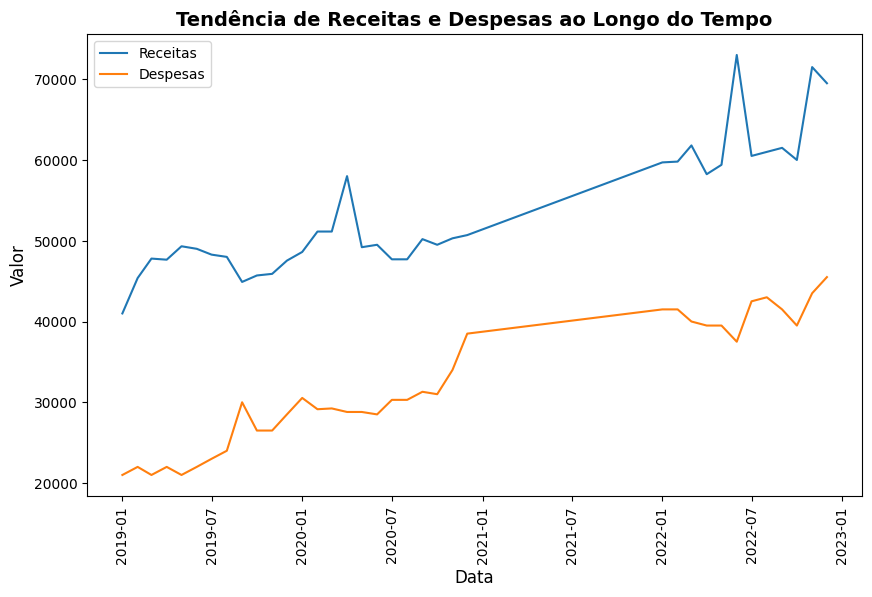

In [48]:
#Agrupando os dados da tabela por data e tipo, temos:
df_agregado = df.groupby(['Data', 'Tipo'])['Valor'].sum().reset_index()

#Separando os dados em dados de receita e dados de despesas separadamente, temos:
data_receitas = df_agregado[df_agregado['Tipo'] == 'Receitas']
data_despesas = df_agregado[df_agregado['Tipo'] == 'Despesas']

#Ajustando o tamanho da figura
plt.figure(figsize=(10, 6))

#Criando os plots
plt.plot(data_receitas['Data'], data_receitas['Valor'], label = 'Receitas')
plt.plot(data_despesas['Data'], data_despesas['Valor'], label = 'Despesas')
plt.plot()

#Definindo título do plot e título dos eixos
plt.xlabel('Data', fontsize = 12)  # Rótulo do eixo x
plt.ylabel('Valor', fontsize = 12)  # Rótulo do eixo y
plt.title('Tendência de Receitas e Despesas ao Longo do Tempo', fontweight = 'bold', fontsize = 14)  # Título do gráfico
plt.legend()  # Adicionando a legenda

plt.xticks(rotation='vertical')  # Rotacionando os rótulos do eixo x para vertical

plt.show()  # Mostrando o gráfico

**INTERPRETAÇÃO**


Com base no gráfico de linhas, é possível verificar que houve uma tendência de aumento tanto nas despesas quanto nas receitas ao longo do tempo, uma vez que as linhas de receitas e despesas estão subindo. Além disso, em nenhum momento do período em análise as linhas se cruzam, o que mostra que entre janeiro de 2019 e janeiro de 2023 a organização apresentou receitas totais superiores as despesas totais. Por fim, é possível observar que as duas linhas apresentam irregularidades (picos e vales) o que indica um certo grau de volatilidade das receitas e despesas. Para entender essa volatilidade, é necessário ter conhecimento sobre o contexto da organização e possível fatores que afetam diretamente nas receitas e despesas.

Para entender melhor o comportamento das receitas e despesas ao longo do tempo, estudos podem ser conduzidos avaliando as tendências de receitas e despesas ao longo do tempo por componente para obter uma análise mais detalhada.

## 2. **Qual componente gera mais receita para a organização?**


Para avaliar qual componente gera mais receita e ter uma visão geral das receitas por componente, foi construído um gráfico de barras horizontais.

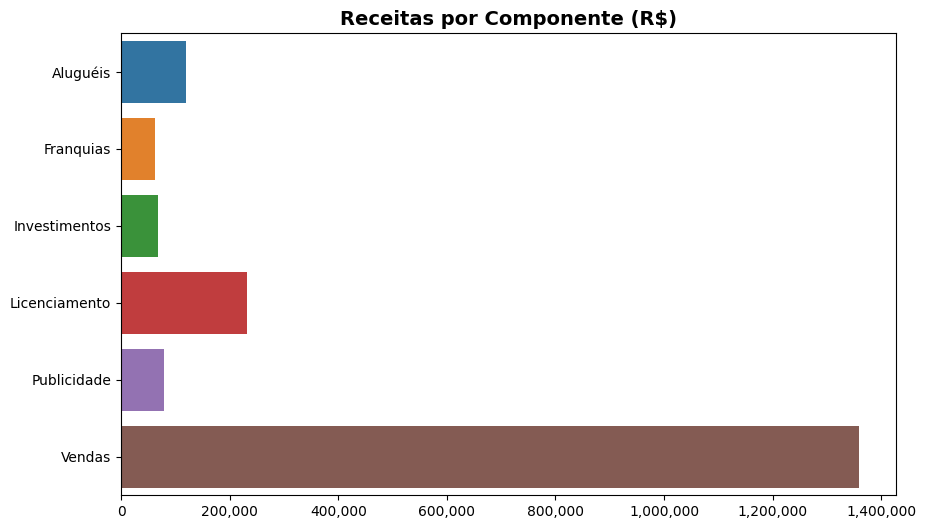

In [49]:
df_agregado = df.groupby(['Tipo','Componente'])['Valor'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x = df_agregado[df_agregado['Tipo'] == 'Receitas']['Valor'], y = df_agregado[df_agregado['Tipo'] == 'Receitas']['Componente'].value_counts().index)

# Formatar o eixo x para evitar abreviação
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Receitas por Componente (R$)', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

**INTERPRETAÇÃO**

A partir do gráfico de barras, é possível observar que o componente de Vendas é o que mais gera receitas para a empresa, tendo faturado mais de 1,3 milhão entre janeiro de 2019 e janeiro de 2023. O segundo componente que mais faturou é o de Licenciamento, responsável pelo faturamento de mais de 200 mil reais.

Logo, o setor de vendas deve receber a maior atenção da gestão da empresa, uma vez que este componente é o grande responsável pela saúde financeira.

## 3.  **Quais são os maiores componentes de despesa da organização?**

Para avaliar os componentes que mais contribuem para as despesas, foi construído um gráfico de barras horizontais.

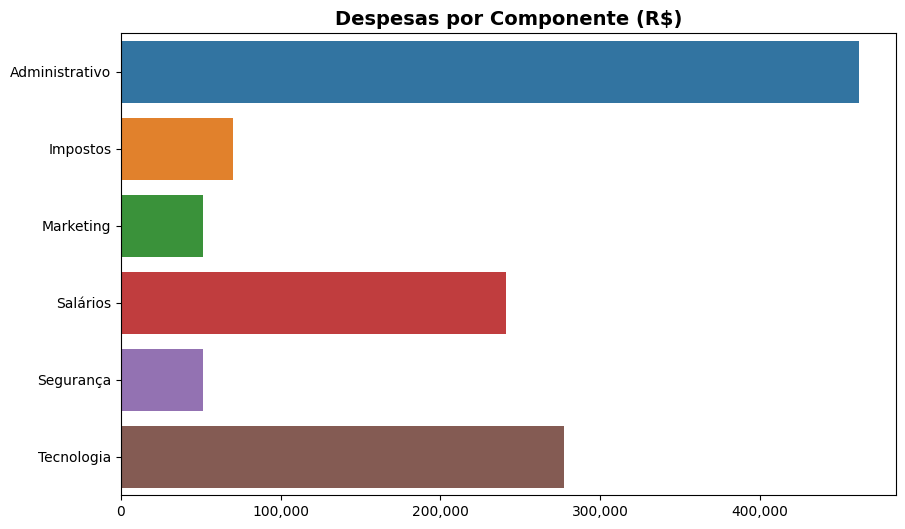

In [50]:
df_agregado = df.groupby(['Tipo','Componente'])['Valor'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x = df_agregado[df_agregado['Tipo'] == 'Despesas']['Valor'], y = df_agregado[df_agregado['Tipo'] == 'Despesas']['Componente'].value_counts().index)

# Formatar o eixo x para evitar abreviação
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Despesas por Componente (R$)', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

**INTERPRETAÇÃO**

De acordo com o gráfico acima, os setores Administrativo, de Tecnologia e Salários são os componentes que mais contribuem para as despesas da organização, respectivamente.

## 4. **Como as receitas e as despesas variam ao longo do ano? Existe alguma sazonalidade?**

A análise de como as receitas variam ao longo do ano pode ser realizada a partir da agregação das despesas e receitas por mês e plotagem de um gráfico de linhas com dois plots: um referente as despesas da organização e o segundo com as receitas. Desse modo, podemos verificar se há sazonalidades ou não.

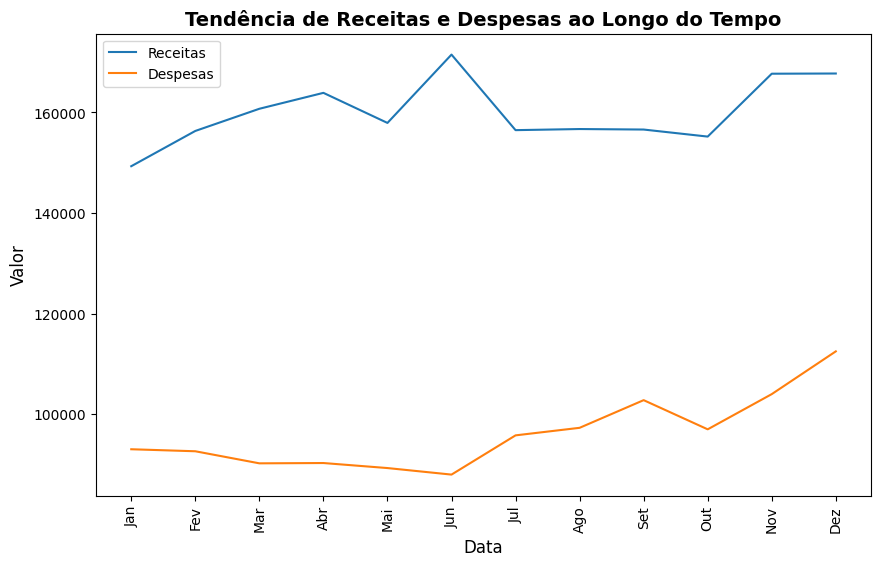

In [51]:
#Criando uma coluna para armazenar o ano
df['Ano'] = df['Data'].dt.year

# Criando uma nova coluna 'Mês' que armazena apenas o mês da data

df['Mes'] = df['Data'].dt.strftime('%B')

df['Mes'] = df['Mes'].replace({'January':'Jan','February':'Fev','March':'Mar','April':'Abr','May':'Mai','June':'Jun',
                   'July':'Jul','August':'Ago','September':'Set','October':'Out','November':'Nov','December':'Dez'})

#Convertendo os meses de string para o tipo numérico.
mapeamento_meses = {'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4,
                    'Mai': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
                    'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12}
df['Mes'] = df['Mes'].map(mapeamento_meses)

#Convertendo o ano e o mês para o formato de string.
df['Data'] = pd.to_datetime(df['Ano'].astype(str) + df['Mes'].astype(str), format='%Y%m')

df_agregado = df.groupby(['Mes', 'Tipo'])['Valor'].sum().reset_index()

data_receitas = df_agregado[df_agregado['Tipo'] == 'Receitas']
data_despesas = df_agregado[df_agregado['Tipo'] == 'Despesas']

plt.figure(figsize=(10, 6))

plt.plot(data_receitas['Mes'], data_receitas['Valor'], label = 'Receitas')
plt.plot(data_despesas['Mes'], data_despesas['Valor'], label = 'Despesas')
plt.plot()

plt.xlabel('Data', fontsize = 12)  # Rótulo do eixo x
plt.ylabel('Valor', fontsize = 12)  # Rótulo do eixo y
plt.title('Tendência de Receitas e Despesas ao Longo do Tempo', fontweight = 'bold', fontsize = 14)  # Título do gráfico
plt.legend()  # Adicionando a legenda

ticks = np.arange(1, 13, 1)

labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.xticks(ticks, labels, rotation='vertical')  # Rotacionando os rótulos do eixo x para vertical

plt.show()  # Mostrando o gráfico

**INTERPRETAÇÃO**

O gráfico acima observa-se um aumento nas despesas da orgnização no segundo semestre.

## 5. **Qual é o fluxo de caixa líquido (receitas menos despesas) da organização em cada mês/ano?**

O cálculo do fluxo de caixa é feito a partir da diferença entre o total de dinheiro que entra e sai da empresa durante um determinado período. Em termos mais técnicos, é a diferente entre as receitas totais e as despesas totais.

O fluxo de caixa líquido mental é calculado a partir da diferença entre receitas totais mensais e despesas totais mensais.

Fluxo de Caixa Líquido Mensal = Receitas Totais Mensais - Despesas Totais Mensais

Podemos avaliar o fluxo de caixa líquido da empresa ao longo do tempo a partir da construção de um gráfico de linhas.

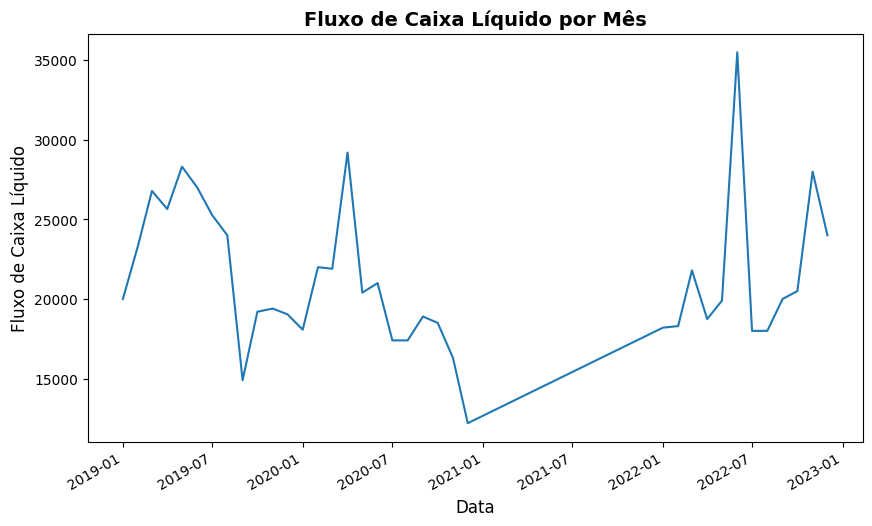

In [52]:
receitas = df[df['Tipo'] == 'Receitas']
despesas = df[df['Tipo'] == 'Despesas']
receitas_mensais = receitas.groupby('Data')['Valor'].sum()
despesas_mensais = despesas.groupby('Data')['Valor'].sum()
fluxo_caixa_mensal = receitas_mensais - despesas_mensais

plt.figure(figsize=(10, 6))
fluxo_caixa_mensal.plot(kind='line', title='Fluxo de caixa líquido por mês (R$)')
plt.title('Fluxo de Caixa Líquido por Mês', fontweight = 'bold', fontsize = 14)
plt.xlabel('Data', fontsize = 12)
plt.ylabel('Fluxo de Caixa Líquido', fontsize = 12)
plt.show()

**INTERPRETAÇÃO**

De acordo com os dados de fluxo de caixa líquido mensal, observa-se uma tendência de diminuição ao longo do tempo. Esse resultado indica que as despesas apresentam uma tendência de aumento maior que a tendência de aumento de receitas.

## 6. **Qual é a proporção de cada componente de receita em relação à receita total? E para as despesas?**

A proporção de cada componente na receita total da empresa e a proporção de cada componente na despesa total podem ser visualizados a partir de gráficos de rosca.

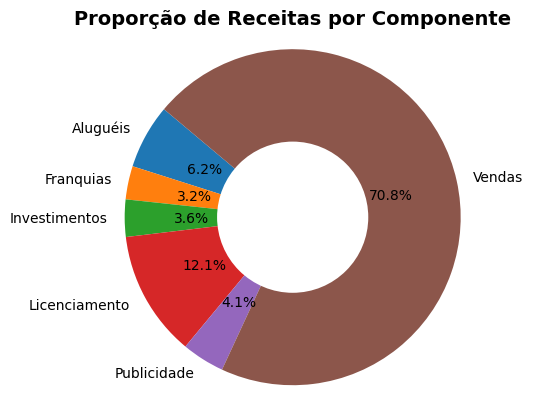

In [53]:
df_agregado = df.groupby(['Tipo','Componente'])['Valor'].sum().reset_index()
df_agregado

# Conta a frequência de cada estado civil
componentes = df_agregado[df_agregado['Tipo'] == 'Receitas']['Valor']

# Cria o gráfico de pizza
plt.pie(componentes, labels = df_agregado[df_agregado['Tipo'] == 'Receitas']['Componente'].value_counts().index, autopct='%1.1f%%', startangle=140)

# Adiciona um círculo branco no meio para transformar o gráfico de pizza em um gráfico de rosca
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equaliza os eixos para garantir que o gráfico seja circular
plt.axis('equal')

# Define o título
plt.title('Proporção de Receitas por Componente', fontweight = 'bold', fontsize = 14)

# Mostra o gráfico
plt.show()

**INTERPRETAÇÃO**

O gráfico de rosca nos dá uma visão geral da contribuição de cada componente nas receitas da empresa. O gráfico mostra que o componente de Vendas contribui com 70,8% das receitas totais. O segundo componente com maior faturamento é o de Licencimento, contribuindo com 12,1% do faturamento. Os componentes de Aluguéis, Publicidade, Investimentos, Franquias respondem por 17,1% da receita total.

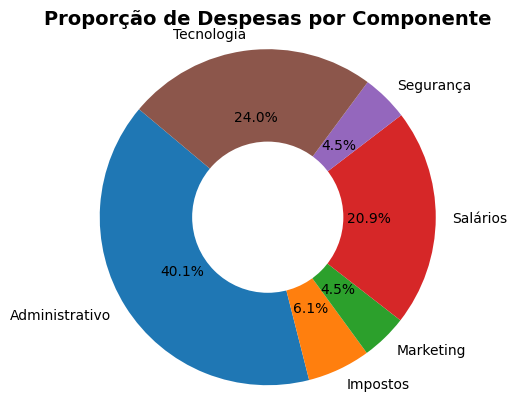

In [54]:
df_agregado = df.groupby(['Tipo','Componente'])['Valor'].sum().reset_index()
df_agregado

# Conta a frequência de cada estado civil
componentes = df_agregado[df_agregado['Tipo'] == 'Despesas']['Valor']

# Cria o gráfico de pizza
plt.pie(componentes, labels = df_agregado[df_agregado['Tipo'] == 'Despesas']['Componente'].value_counts().index, autopct='%1.1f%%', startangle=140)

# Adiciona um círculo branco no meio para transformar o gráfico de pizza em um gráfico de rosca
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equaliza os eixos para garantir que o gráfico seja circular
plt.axis('equal')

# Define o título
plt.title('Proporção de Despesas por Componente', fontweight = 'bold', fontsize = 14)

# Mostra o gráfico
plt.show()

**INTERPRETAÇÃO**

Analisando as proporções de despesas por componente, é possível verificar que o Administrativo Tecnologia e Salários contribuem com 85% das despesas da organização, sendo o Administrativo o setor que apresenta a maior contribuição com 40,1%. Os 15% restantes estão distribuídas entre Impostos, Segurança e Marketing.

# **Construção dos Dashboards**

O dashboard construído no Power BI para responder as perguntas formuladas acima e acompanhar as informações em tempo real, é mostrado na imagem abaixo:

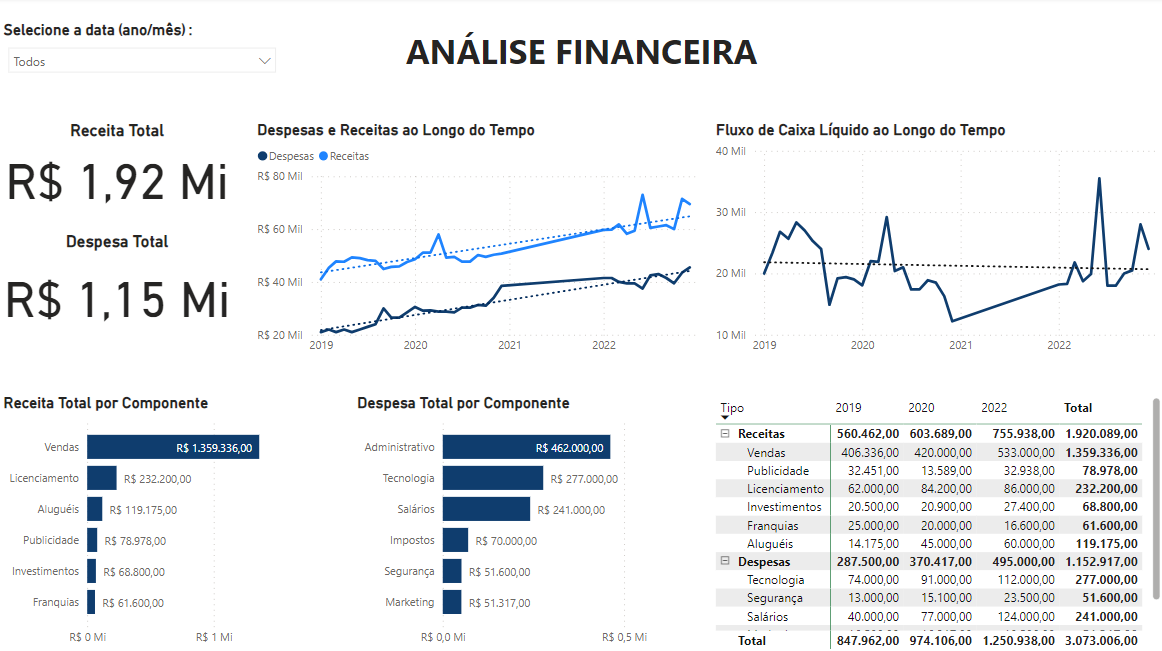

No dashboards construídos temos as seguintes informações:

1. **Receita Total**: este indicador mostra o montante total arrecadado entre janeiro de 2019 e janeiro de 2023;

2. **Despesa Total**: este indicador mostra o total gasto com despesas no mesmo período de tempo;

3. **Receita Total por Componente**: o gráfico de barras permite a visualização do faturamento por cada componente específico;

4. **Despesa Total por Componente**: o gráfico de barras permite a visualização dos principais componentes que compõem as despesas totais da empresa;

5. **Despesas e Receitas ao Longo do Tempo**: o gráfico de linhas permite acompanhar a evolução das receitas e despesas ao longo do tempo, facilitando a identificação de tendências e padrões;

6. **Fluxo de Caixa Líquido ao Longo do Tempo**: neste gráfico de linha o usuário pode observar a evolução, os padrões e as tendências do fluxo de caixa líquido;

7. **Matriz com hierarquia de tipo e componente**: esta matriz fornece uma visualização detalhada das receitas e despesas, divididas por componente e distribuídas ao longo dos anos.


Além disso, o dashboard conta com o recurso de segmentação de dados por ano e mês, permitindo ao usuário focar nas informações de um período específico. Esta ferramenta proporciona maior flexibilidade e especificade na análise de dados.

**JUSTIFICATIVA DO USO DE DASHBOARDS**

O uso de dashboard no presente projeto de análise de dados financeiros se justifica pelos seguintes motivos:

1. **Visualização de dados**: dashboards interativos fornecem uma repesentação gráfica visual clara e intuitiva para os dados. Eles permitem que os usuários vejam de forma rápida e eficiente as informações essenciais para a tomada de decisões;

2. **Interatividade**: permitem que os usuários interajam com os dados. Isso pode envolver a filtragem de informações, a alteração do período de tempo, etc;

3. **Acessibilidade**: as informações, desde que armazenadas em nuvem, podem ser acessadas de qualquer lugar, a qualquer hora;

4. Atualização em tempo real: possui a capacidade de atualizar os dados em tempo real ou em intervalos regulares, garantindo que os usuários estejam sempre olhando para as informações mais recentes e atualizadas.